# Assignment 2

In [1]:
#Loading the dataset through keras
import numpy as np
from tensorflow import keras
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


# Load Fashion-MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()




#From : https://stackoverflow.com/questions/51202181/how-do-i-select-only-a-specific-digit-from-the-mnist-dataset-provided-by-keras


# Use only the data points from classes 0 and 6 
# Only use 1000 training examples for each class to avoid  wasting alot of time on training the data for the sake of the assignment.

# set the random state
np.random.seed(42)

train_filter_0 = np.random.choice(np.where(Y_train == 0)[0], size=1000, replace=False)
train_filter_6 = np.random.choice(np.where(Y_train == 6)[0], size=1000, replace=False)
train_filter = np.concatenate((train_filter_0, train_filter_6))

test_filter = np.where((Y_test == 0) | (Y_test == 6))

x_train, y_train = X_train[train_filter], Y_train[train_filter]
x_test, y_test = X_test[test_filter], Y_test[test_filter]


#From: https://stackoverflow.com/questions/34972142/sklearn-logistic-regression-valueerror-found-array-with-dim-3-estimator-expec

nsamples, nx, ny = x_train.shape
x_train = x_train.reshape((nsamples,nx*ny))

nsamples, nx, ny = x_test.shape
x_test = x_test.reshape((nsamples,nx*ny))

#From: https://scikit-learn.org/stable/modules/preprocessing.html

scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)

scaler = preprocessing.StandardScaler().fit(x_test)
x_test = scaler.transform(x_test)



#This is used for the Third and  Fourth section because the optimized C is used on the ENTIRE training set
# Use only the data points from classes 0 and 6
class_indices = np.where((Y_train == 0) | (Y_train == 6))
X_train = X_train[class_indices]
Y_train = Y_train[class_indices]

class_indices = np.where((Y_test == 0) | (Y_test == 6))
X_test = X_test[class_indices]
Y_test = Y_test[class_indices]


#From: https://stackoverflow.com/questions/34972142/sklearn-logistic-regression-valueerror-found-array-with-dim-3-estimator-expec

nsamples, nx, ny = X_train.shape
X_train = X_train.reshape((nsamples,nx*ny))

nsamples, nx, ny = X_test.shape
X_test = X_test.reshape((nsamples,nx*ny))

#From: https://scikit-learn.org/stable/modules/preprocessing.html

scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

scaler = preprocessing.StandardScaler().fit(X_test)
X_test = scaler.transform(X_test)


## First :  Logistic regression

In [2]:
from sklearn.linear_model import LogisticRegression

In [3]:
clf1 = LogisticRegression(penalty = "l2",random_state = 40, max_iter = 100, C = 1*10**(-22))
clf1.fit(x_train, y_train)

print("train accuracy:",clf1.score(x_train,y_train))
print("test accuracy: ",clf1.score(x_test,y_test))

train accuracy: 0.5
test accuracy:  0.5


In [4]:
clf2 = LogisticRegression(penalty = "l2",random_state = 40, max_iter = 100, C = 1*10**(-23))
clf2.fit(x_train, y_train)

print("train accuracy:",clf2.score(x_train,y_train))
print("test accuracy: ",clf2.score(x_test,y_test))

train accuracy: 0.5
test accuracy:  0.5


In [5]:
clf3 = LogisticRegression(penalty = "l2",random_state = 40, max_iter = 100, C = 1*10**(-24))
clf3.fit(x_train, y_train)

print("train accuracy:",clf3.score(x_train,y_train))
print("test accuracy: ",clf3.score(x_test,y_test))

train accuracy: 0.5
test accuracy:  0.5


When c is very low both train and test accuracy stay at 0.5. Even though there is no over or underfitting the accuracy level of both the test and training set is very low. 

In [6]:
clf14 = LogisticRegression(penalty = "l2",random_state = 40, max_iter = 10000, C = 0.0000001)
clf14.fit(x_train, y_train)

print("train accuracy:",clf14.score(x_train,y_train))
print("test accuracy: ",clf14.score(x_test,y_test))

train accuracy: 0.7995
test accuracy:  0.78


In [7]:
clf13 = LogisticRegression(penalty = "l2",random_state = 40, max_iter = 10000, C = 0.000001)
clf13.fit(x_train, y_train)

print("train accuracy:",clf13.score(x_train,y_train))
print("test accuracy: ",clf13.score(x_test,y_test))

train accuracy: 0.8035
test accuracy:  0.781


In [8]:
clf12 = LogisticRegression(penalty = "l2",random_state = 40, max_iter = 10000, C = 0.00001)
clf12.fit(x_train, y_train)

print("train accuracy:",clf12.score(x_train,y_train))
print("test accuracy: ",clf12.score(x_test,y_test))

train accuracy: 0.818
test accuracy:  0.7895


In [9]:
clf11 = LogisticRegression(penalty = "l2",random_state = 40, max_iter = 10000, C = 0.0001)
clf11.fit(x_train, y_train)

print("train accuracy:",clf11.score(x_train,y_train))
print("test accuracy: ",clf11.score(x_test,y_test))

train accuracy: 0.829
test accuracy:  0.8


In [10]:
clf10 = LogisticRegression(penalty = "l2",random_state = 40, max_iter = 10000, C = 0.001)
clf10.fit(x_train, y_train)

print("train accuracy:",clf10.score(x_train,y_train))
print("test accuracy: ",clf10.score(x_test,y_test))

train accuracy: 0.862
test accuracy:  0.8235


In [11]:
clf5 = LogisticRegression(penalty = "l2",random_state = 40,max_iter = 1000, C = 0.01)
clf5.fit(x_train, y_train)

print("train accuracy:",clf5.score(x_train,y_train))
print("test accuracy: ",clf5.score(x_test,y_test))


train accuracy: 0.9065
test accuracy:  0.8335


In [12]:
clf6 = LogisticRegression(penalty = "l2",random_state = 40, max_iter = 1000, C = 0.1)
clf6.fit(x_train, y_train)

print("train accuracy:",clf6.score(x_train,y_train))
print("test accuracy: ",clf6.score(x_test,y_test))

train accuracy: 0.9525
test accuracy:  0.828


In [13]:
clf7 = LogisticRegression(penalty = "l2",random_state = 40, max_iter = 1000, C = 1)
clf7.fit(x_train, y_train)

print("train accuracy:",clf7.score(x_train,y_train))
print("test accuracy: ",clf7.score(x_test,y_test))

train accuracy: 0.9865
test accuracy:  0.8035


In [14]:
clf8 = LogisticRegression(penalty = "l2",random_state = 40, max_iter = 900, C = 10)
clf8.fit(x_train, y_train)

print("train accuracy:",clf8.score(x_train,y_train))
print("test accuracy: ",clf8.score(x_test,y_test))

train accuracy: 1.0
test accuracy:  0.786


In [15]:
clf9 = LogisticRegression(penalty = "l2",random_state = 40, max_iter = 2000, C = 100)
clf9.fit(x_train, y_train)

print("train accuracy:",clf9.score(x_train,y_train))
print("test accuracy: ",clf9.score(x_test,y_test))

train accuracy: 1.0
test accuracy:  0.7825


In [16]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

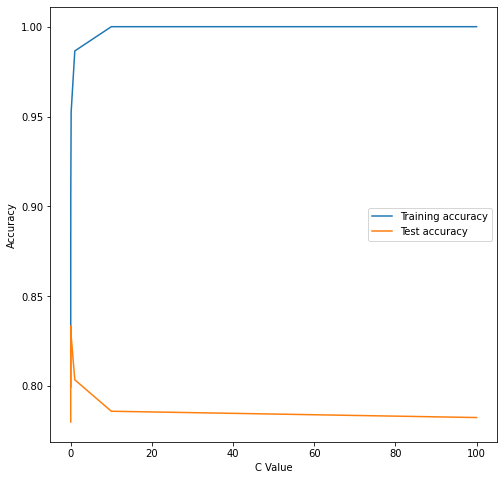

In [17]:
test_acc = []
train_acc = []


# Define a logarithmically spaced grid of regularization parameters
C0 = 0.0000001
alpha = 10
num_points =10
C_vals = C0 * alpha**np.arange(num_points)


#From: Assignment 1
for C in C_vals:
    clf15 = LogisticRegression(penalty = "l2",random_state = 40, max_iter = 2000, C = C)
    clf15.fit(x_train, y_train)

    train_acc.append(clf15.score(x_train,y_train))
    test_acc.append(clf15.score(x_test,y_test))

plt.figure(figsize = (8,8))
plt.plot(C_vals,train_acc)
plt.plot(C_vals, test_acc)
plt.xlabel('C Value')
plt.ylabel('Accuracy')
plt.legend(['Training accuracy','Test accuracy'])

It's hard to tell from the graph but it's obvious from my calculations that as  my regularization parameter increases the overfitting increases even by a small amount. And there's no underfitting from the calculations I did. This means regardless of C the training accuracy will never be higher than the training set accuracy. This makes it impossible for us find that sweet pot where the two (training acc and test acc) meet because they never do. So for this model the best we could do is choose a regularization parameter that maximizes the values of the training and test accuracy and minimizes the overfitting of the two. 

When the regularization parameter is very low there is little to no overfitting. For example when C = 0.0000000000000000000001 both training and test accuracy are almost the same however, they have a low accuracy level of 0.5. 

Therefore, I personally think that the best value for C is 0.0001 as the result achieved from this was the highest possible training and test accuracy (0.829 & 0.8 respectively) one could get for this model while keeping the overfitting to a minimum.

## Second : Linear SVM

In [18]:
from sklearn.svm import LinearSVC

In [19]:
clf16 = LinearSVC(random_state = 40, max_iter = 100, C = 1*10**-11)
clf16.fit(x_train, y_train)

print("train accuracy:",clf16.score(x_train,y_train))
print("test accuracy: ",clf16.score(x_test,y_test))

train accuracy: 0.7985
test accuracy:  0.78


In [20]:
clf17 = LinearSVC(random_state = 40, max_iter = 100, C = 1*10**-20)
clf17.fit(x_train, y_train)

print("train accuracy:",clf17.score(x_train,y_train))
print("test accuracy: ",clf17.score(x_test,y_test))

train accuracy: 0.7985
test accuracy:  0.78


Similar to linear regression after some point no matter how low C is the training and test accuracy becomes constant. But not as low as what it would have been in linear regression.

Below each plot represents a different range of C. This is because I want to explore the range of C that gives the highest training and test accuracy with a low level of overfitting

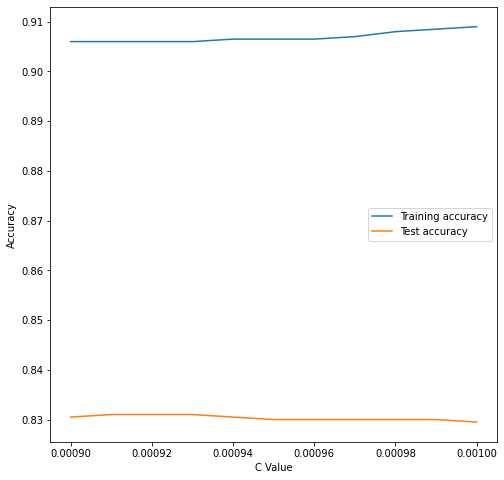

In [21]:
test_acc = []
train_acc = []


C_vals = np.arange(0.0009,0.001,0.00001)




for C in C_vals:
    clf23 = LinearSVC(C=C, random_state = 40, max_iter = 2000)
    clf23.fit(x_train, y_train)
    
    train_acc.append(clf23.score(x_train,y_train))
    test_acc.append(clf23.score(x_test,y_test))

plt.figure(figsize = (8,8))
plt.plot(C_vals,train_acc)
plt.plot(C_vals, test_acc)
plt.xlabel('C Value')
plt.ylabel('Accuracy')
plt.legend(['Training accuracy','Test accuracy'])

Test Accuracy : 0.83 (approx)

Training accuracy : 0.905 (approx)

Overfitting = 0.075

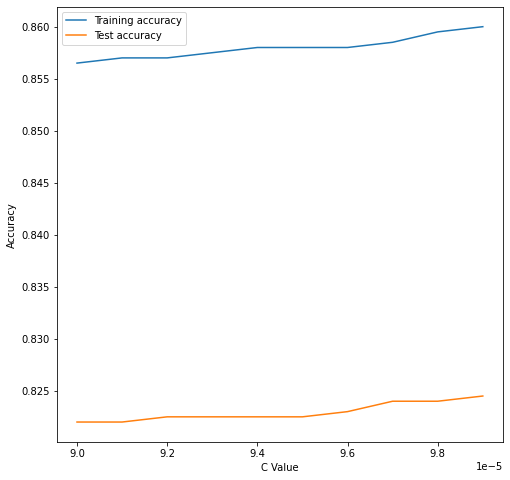

In [22]:
test_acc = []
train_acc = []


C_vals = np.arange(0.00009,0.0001,0.000001)




for C in C_vals:
    clf24 = LinearSVC(C=C, random_state = 40, max_iter = 2000)
    clf24.fit(x_train, y_train)
    
    train_acc.append(clf24.score(x_train,y_train))
    test_acc.append(clf24.score(x_test,y_test))

plt.figure(figsize = (8,8))
plt.plot(C_vals,train_acc)
plt.plot(C_vals, test_acc)
plt.xlabel('C Value')
plt.ylabel('Accuracy')
plt.legend(['Training accuracy','Test accuracy'])

Test Accuracy : 0.825 (approx)

Training accuracy : 0.860 (approx)

Overfitting = 0.035

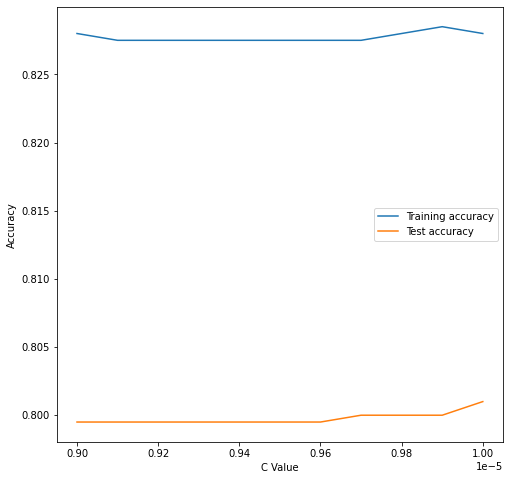

In [23]:
test_acc = []
train_acc = []


C_vals = np.arange(0.000009,0.00001,0.0000001)




for C in C_vals:
    clf25 = LinearSVC(C=C, random_state = 40, max_iter = 2000)
    clf25.fit(x_train, y_train)
    
    train_acc.append(clf25.score(x_train,y_train))
    test_acc.append(clf25.score(x_test,y_test))

plt.figure(figsize = (8,8))
plt.plot(C_vals,train_acc)
plt.plot(C_vals, test_acc)
plt.xlabel('C Value')
plt.ylabel('Accuracy')
plt.legend(['Training accuracy','Test accuracy'])

Test Accuracy : 0.8 (approx)

Training accuracy : 0.828 (approx)

Overfitting = 0.028

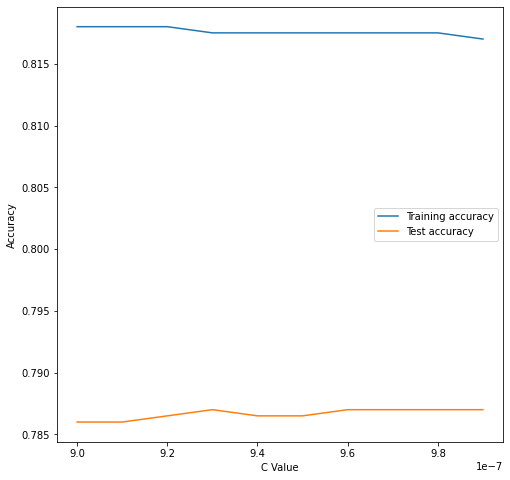

In [24]:
test_acc = []
train_acc = []


C_vals = np.arange(0.0000009,0.000001,0.00000001)




for C in C_vals:
    clf26 = LinearSVC(C=C, random_state = 40, max_iter = 2000)
    clf26.fit(x_train, y_train)
    
    train_acc.append(clf26.score(x_train,y_train))
    test_acc.append(clf26.score(x_test,y_test))

plt.figure(figsize = (8,8))
plt.plot(C_vals,train_acc)
plt.plot(C_vals, test_acc)
plt.xlabel('C Value')
plt.ylabel('Accuracy')
plt.legend(['Training accuracy','Test accuracy'])

Test Accuracy : 0.786 (approx)

Training accuracy : 0.818 (approx)

Overfitting = 0.032

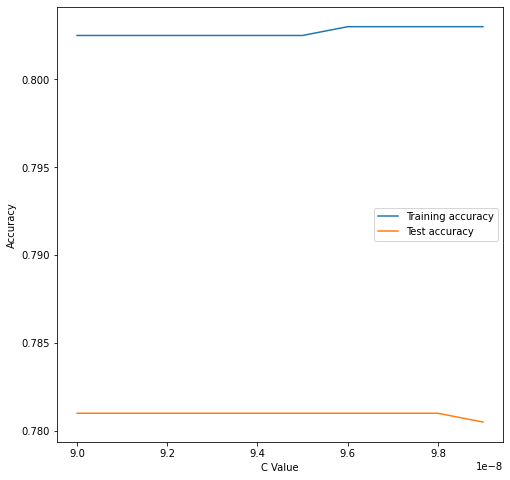

In [25]:
test_acc = []
train_acc = []


C_vals = np.arange(0.00000009,0.0000001,0.000000001)




for C in C_vals:
    clf27 = LinearSVC(C=C, random_state = 40, max_iter = 2000)
    clf27.fit(x_train, y_train)
    
    train_acc.append(clf27.score(x_train,y_train))
    test_acc.append(clf27.score(x_test,y_test))

plt.figure(figsize = (8,8))
plt.plot(C_vals,train_acc)
plt.plot(C_vals, test_acc)
plt.xlabel('C Value')
plt.ylabel('Accuracy')
plt.legend(['Training accuracy','Test accuracy'])

Towards the end of this range at around C = 0.000000098

Test Accuracy : 0.7815 (approx)

Training accuracy : 0.8035 (approx)

Overfitting = 0.022

Roughly as the range of C values increase the overfitting increase. The best range for the c value we can take in my opinion is a value between 0.000009 and 0.00001. So C = 0.0000095 would be the best possible the regularization paameter can have for this dataset and chosen model.

## Third: k-fold

In [39]:
from sklearn.svm import SVC

In [40]:
def k_fold_cross_validation(X_train, y_train, k):
    np.random.seed(42)
    n_samples = X_train.shape[0]
    fold_size = n_samples // k
    linear_svm_scores = []
    logreg_scores = []
    C_range = [0.00000001,0.0000001,0.000001,0.00001,0.0001,0.001,0.01, 0.1]


    # SVM & Logistic regression k-fold cross-validation
    for C in C_range:
        linear_svm_score = 0
        logreg_score = 0
        for fold in range(k):
            fold_start = fold * fold_size
            fold_end = (fold + 1) * fold_size
            X_val_fold = X_train[fold_start:fold_end]
            y_val_fold = y_train[fold_start:fold_end]
            X_train_fold = np.concatenate((X_train[:fold_start], X_train[fold_end:]), axis=0)
            y_train_fold = np.concatenate((y_train[:fold_start], y_train[fold_end:]), axis=0)

            linear_svm_model = LinearSVC(C=C, random_state = 40, max_iter = 5000)
            linear_svm_model.fit(X_train_fold, y_train_fold)
            linear_svm_score += linear_svm_model.score(X_val_fold, y_val_fold)

            logreg_model = LogisticRegression(penalty = "l2",random_state = 40, max_iter = 1000, C =C)
            logreg_model.fit(X_train_fold, y_train_fold)
            logreg_score += logreg_model.score(X_val_fold, y_val_fold)

        linear_svm_scores.append(linear_svm_score / k)
        logreg_scores.append(logreg_score / k)

    


        

    # Find best regularization parameter for SVM and logistic regression
    best_linear_svm_C = C_range[np.argmax(linear_svm_scores)]
    best_logreg_C = C_range[np.argmax(logreg_scores)]

    return best_linear_svm_C, best_logreg_C


The code performs k-fold cross-validation to tune the hyperparameters (C) for two classification models, Linear SVM and Logistic Regression. It uses the training data to divide it into k-folds and trains each model on k-1 folds while validating on the remaining fold. This process is repeated for different values of C, and the average validation score for each C value is computed. The code then selects the value of C that gives the highest validation score for each model and returns them. Finally, the optimal models are trained on the entire training set and tested on a separate test set to report their test error.

In [41]:
array = k_fold_cross_validation(x_train, y_train, 10)

In [42]:
print("Optimal regularization parameter for Logistic Regresion : ", array[1])
print("Optimal regularization parameter for SVM                : ", array[0])

Optimal regularization parameter for Logistic Regresion :  0.01
Optimal regularization parameter for SVM                :  0.0001


Below I will train each model using the entire training set and evaluate their performance on the test set.

In [43]:
# Train SVM model on full training set with optimal regularization parameter
linear_svm_model = LinearSVC(C=array[0], random_state=40, max_iter=5000)
linear_svm_model.fit(X_train, Y_train)
y_test_pred_svm = linear_svm_model.predict(X_test)


# Train logistic regression model on full training set with optimal regularization parameter
logreg_model = LogisticRegression(penalty="l2", random_state=40, max_iter=3000, C=array[1])
logreg_model.fit(X_train, y=Y_train)
y_test_pred_logreg = logreg_model.predict(X_test)

# Evaluate test error for SVM model
linear_svm_test_error = 1 - linear_svm_model.score(X_test, Y_test)

# Evaluate test error for logistic regression model
logreg_test_error = 1 - logreg_model.score(X_test, Y_test)

print("SVM test error:", linear_svm_test_error)
print("Logistic regression test error:", logreg_test_error)

SVM test error: 0.15400000000000003
Logistic regression test error: 0.15400000000000003


Now I will determine if the test errors are significantly different by calculating the confidence intervals.

In [44]:
import scipy.stats as stats

In [46]:
# Calculate standard error for SVM model
linear_svm_std_error = np.std(Y_test) / np.sqrt(len(Y_test))
linear_svm_ci = stats.t.interval(0.95, len(Y_test) - 1, loc=linear_svm_test_error, scale=linear_svm_std_error)

# Calculate standard error for logistic regression model
logreg_std_error = np.std(Y_test) / np.sqrt(len(Y_test))
logreg_ci = stats.t.interval(0.95, len(Y_test) - 1, loc=logreg_test_error, scale=logreg_std_error)

# Print confidence intervals for each model's test error
print("SVM 95% confidence interval:", linear_svm_ci)
print("Logistic regression 95% confidence interval:", logreg_ci)

SVM 95% confidence interval: (0.022441963309851237, 0.2855580366901488)
Logistic regression 95% confidence interval: (0.022441963309851237, 0.2855580366901488)


The SVM and logistic regression models have similar test error rates, with both having a test error of approximately 0.15. The confidence intervals for the test errors of both models overlap, indicating that the difference in mean test errors between the models is not statistically significant at a 95% confidence level. 

## Fourth : SVM with Gaussian Kernel

In [48]:
k = 10

n_samples = x_train.shape[0]
fold_size = n_samples // k
# svm_scores = []
train_acc = []
test_acc = []
C_range = [0.00000001,0.0000001,0.000001,0.00001,0.0001,0.001,0.01, 0.1]
gamma_range = np.logspace(-9, 3, 13)
# gamma_range = [0.00000001,0.00000005,0.0000001,0.0000005,0.000001,0.000005,0.00001,0.00005]




for gamma in gamma_range:
    svm_scores = []
    for C in C_range:
        svm_score = 0
        for fold in range(k):
            fold_start = fold * fold_size
            fold_end = (fold + 1) * fold_size
            X_val_fold = x_train[fold_start:fold_end]
            y_val_fold = y_train[fold_start:fold_end]
            X_train_fold = np.concatenate((x_train[:fold_start], x_train[fold_end:]), axis=0)
            y_train_fold = np.concatenate((y_train[:fold_start], y_train[fold_end:]), axis=0)

            svm_model = SVC(kernel='rbf',gamma = gamma, C=C, random_state = 40, max_iter = 5000)
            svm_model.fit(X_train_fold, y_train_fold)
            svm_score += svm_model.score(X_val_fold, y_val_fold)
            
            
        svm_scores.append(svm_score / k)

    # Train SVM model on full training set with optimal regularization parameter
    svm_model = SVC(C=C_range[np.argmax(svm_scores)],kernel='rbf',gamma = gamma, random_state = 40, max_iter = 510000)
    svm_model.fit(X_train, Y_train)
    y_test_pred_svm = svm_model.predict(X_test)

    # Evaluate test error for SVM model
    svm_test_error = 1 - svm_model.score(X_test, Y_test)
    svm_training_error = 1 - svm_model.score(X_train, Y_train)

    print("Gamma: ", gamma)
    print("Optimal C: ", C_range[np.argmax(svm_scores)])
    print("SVM test error:", svm_test_error)
    print("SVM training error:", svm_training_error)
    train_acc.append(svm_training_error)
    test_acc.append(svm_test_error)
    print("\n")



Gamma:  1e-09
Optimal C:  1e-08
SVM test error: 0.21750000000000003
SVM training error: 0.2004166666666667


Gamma:  1e-08
Optimal C:  1e-08
SVM test error: 0.21750000000000003
SVM training error: 0.20025000000000004


Gamma:  1e-07
Optimal C:  1e-08
SVM test error: 0.21799999999999997
SVM training error: 0.2004166666666667


Gamma:  1e-06
Optimal C:  1e-08
SVM test error: 0.21799999999999997
SVM training error: 0.20016666666666671


Gamma:  1e-05
Optimal C:  1e-08
SVM test error: 0.21350000000000002
SVM training error: 0.20066666666666666


Gamma:  0.0001
Optimal C:  0.1
SVM test error: 0.1995
SVM training error: 0.1795


Gamma:  0.001
Optimal C:  0.1
SVM test error: 0.1745
SVM training error: 0.1515833333333333


Gamma:  0.01
Optimal C:  0.1
SVM test error: 0.21950000000000003
SVM training error: 0.17200000000000004


Gamma:  0.1
Optimal C:  1e-08
SVM test error: 0.49850000000000005
SVM training error: 0.0


Gamma:  1.0
Optimal C:  1e-08
SVM test error: 0.5
SVM training error: 0.0




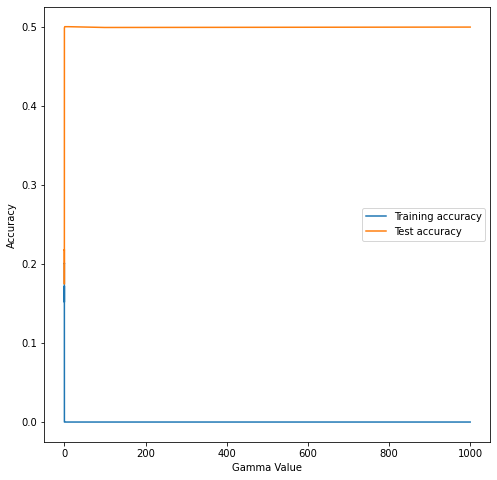

In [50]:




plt.figure(figsize = (8,8))
plt.plot(gamma_range,train_acc)
plt.plot(gamma_range,test_acc)
plt.xlabel('Gamma Value')
plt.ylabel('Accuracy')
plt.legend(['Training accuracy','Test accuracy'])

Again it's not obvious from the plot but from from the output from the code before we can conclude that as the gamma value increase the test error increase to as high as 0.5 and training error reduces to as low as 0. The value for gamma that give the lowest amount of overfitting while keeping the errors at aminimum in my opinion is Gamma:  1e-05


The test error for the linear svm model was much lower than for the kernalised SVM model.